# The Sparks Foundation Task-3 Prediction using Unsupervised learning

## Problem statement

From the given Iris dataset, predict the optimum number of clusters and represent it visually.

### Importing libraries and loading the dataset

In [12]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from warnings import filterwarnings
filterwarnings('ignore')

#from scipy.stats import zscore
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [13]:
df_iris = pd.read_csv('Iris.csv')
df_iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [24]:
# Dropping unneeded features
df_iris.drop(['Id'],1,inplace=True) 

In [25]:
df_iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### Understanding the data

In [26]:
df_iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [27]:
#understadnign the total types of class
df_iris['Species'].value_counts()

Iris-virginica     50
Iris-versicolor    50
Iris-setosa        50
Name: Species, dtype: int64

### Checking for null values

In [28]:
df_iris.isnull().sum()/len(df_iris)*100

SepalLengthCm   0.0
SepalWidthCm    0.0
PetalLengthCm   0.0
PetalWidthCm    0.0
Species         0.0
dtype: float64

In [21]:
# Null value percentage is zero

### Checking and treating for outliers

In [30]:
df_num = df_iris.select_dtypes(include = np.number)

In [31]:
col=list(df_num)
col

['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']

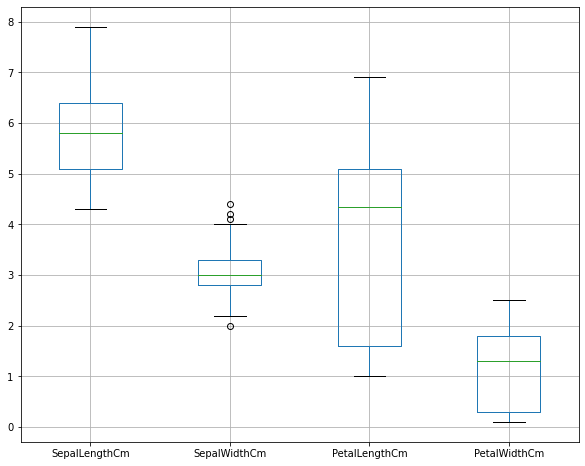

In [34]:
#boxplot
plt.figure(figsize=(10,8))
df_num.boxplot()
plt.show()

<!-- ### Removing outliers from 'SepalWidthCm' -->

In [35]:
# IQR method
Q1 = df_iris.quantile(0.25)
Q3 = df_iris.quantile(0.75)
IQR = Q3 - Q1

df_iris = df_iris[~((df_iris < (Q1 - 1.5 * IQR)) | (df_iris > (Q3 + 1.5 * IQR))).any(axis=1)]
df_iris = df_iris.reset_index(drop=True)

In [36]:
df_iris.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

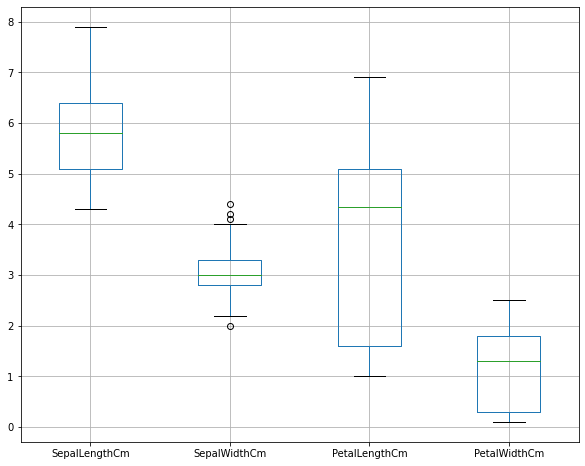

In [37]:
#boxplot
plt.figure(figsize=(10,8))
df_num.boxplot()
plt.show()

In [ ]:
# Effect of outliers has been reduced

### Building the model using KMeans

In [50]:
X = df_iris.iloc[:,1:4]
X.head()

,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,3.5,1.4,0.2
1,3.0,1.4,0.2
2,3.2,1.3,0.2
3,3.1,1.5,0.2
4,3.6,1.4,0.2


In [51]:
#standardazisng all the features
sc = StandardScaler()
Xs = sc.fit_transform(X)
X_sc = pd.DataFrame(Xs, columns = X.columns)
X_sc.head()

,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,1.2,-1.4,-1.3
1,-0.1,-1.4,-1.3
2,0.4,-1.4,-1.3
3,0.2,-1.3,-1.3
4,1.4,-1.4,-1.3


In [58]:
y = df_iris['Species']
y.head()

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: Species, dtype: object

In [60]:
#initialising the model
kmeans = KMeans(n_clusters = 3, init ='k-means++', random_state = 12)

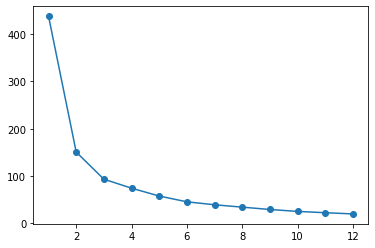

In [65]:
#elbow plot
cluster_range  = range(1, 13)
cluster_errors = []

for num_clusters in cluster_range:
    kmeans = KMeans(n_clusters = num_clusters, init ='k-means++', random_state = 1)
    kmeans.fit(X_sc)
    cluster_errors.append(kmeans.inertia_)
    
clusters_df = pd.DataFrame({'Num_Clusters': cluster_range, 'Inertia' :  cluster_errors})
#ploting
plt.plot(clusters_df['Num_Clusters'],clusters_df['Inertia'],marker='o')
plt.show()

we can infer that the optimal number of clusters is around 3.

### Building the Final Model

In [67]:
kmeans  = KMeans(n_clusters=3, init = 'k-means++',random_state=12)
kmeans.fit(X_sc)
y_kmeans = kmeans.fit_predict(X_sc)

In [68]:
# centroids
centroids = kmeans.cluster_centers_
centroids = pd.DataFrame(centroids, columns = X_sc.columns)
centroids

,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,-0.9,0.3,0.2
1,0.9,-1.3,-1.3
2,0.2,1.0,1.0


In [71]:
# Creating dataframe for labels and converting it as 'object'

df_labels = pd.DataFrame(kmeans.labels_, columns = list(['Labels'])) 

df_labels['Labels'] = df_labels['Labels'].astype('object')

df_labels.head()

,Labels
0,1
1,1
2,1
3,1
4,1


### Evaluating the Model

In [72]:
#joinig tables to compare
final = df_iris.join(df_labels)

In [74]:
final.head(10)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Labels
0,5.1,3.5,1.4,0.2,Iris-setosa,1
1,4.9,3.0,1.4,0.2,Iris-setosa,1
2,4.7,3.2,1.3,0.2,Iris-setosa,1
3,4.6,3.1,1.5,0.2,Iris-setosa,1
4,5.0,3.6,1.4,0.2,Iris-setosa,1
5,5.4,3.9,1.7,0.4,Iris-setosa,1
6,4.6,3.4,1.4,0.3,Iris-setosa,1
7,5.0,3.4,1.5,0.2,Iris-setosa,1
8,4.4,2.9,1.4,0.2,Iris-setosa,1
9,4.9,3.1,1.5,0.1,Iris-setosa,1


In [75]:
#iris
df_iris['Species'].value_counts()

Iris-virginica     50
Iris-versicolor    49
Iris-setosa        47
Name: Species, dtype: int64

In [77]:
#kmeans
final['Labels'].value_counts()

0    53
2    47
1    46
Name: Labels, dtype: int64

### Kmeans Visualization

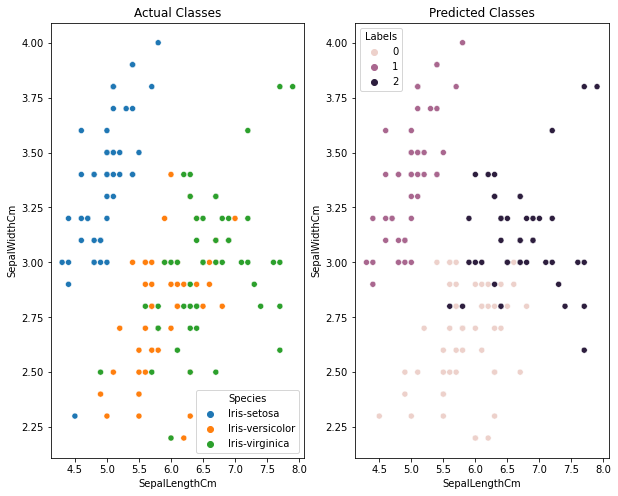

In [85]:
fig, ax = plt.subplots(1,2,figsize=(10,8))

ax1 = plt.subplot(1,2,1)
plt.title('Actual Classes')
sns.scatterplot(x='SepalLengthCm', y='SepalWidthCm', hue= 'Species', data = df_iris)

ax2 = plt.subplot(1,2,2)
plt.title('Predicted Classes')
sns.scatterplot(x='SepalLengthCm', y='SepalWidthCm', hue='Labels', data=final)
plt.show()